### Белянинов Илья ПМ22-1

### Семинар

1) Загрузите датасет breast_cancer из библиотеки sklearn.\
2) Выведите в виде гистограммы распределения непрерывных атрибутов в этом наборе данных.\
3) Постройте модель наивного байесовского классификатора на первых двух столбцах и оцените ее качество.\
4) Постройте ту же модель на полном датасете и сравните ее качество с первой.\
5) Отберите признаки, соответствующие выбранному модельному виду распределения. Постройте модель на выбранных признаках и сравните ее с предыдущей.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [3]:
data = datasets.load_breast_cancer()

In [4]:
X = data.data[:, :2]
y = data.target

In [5]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Text(0, 0.5, 'X1')

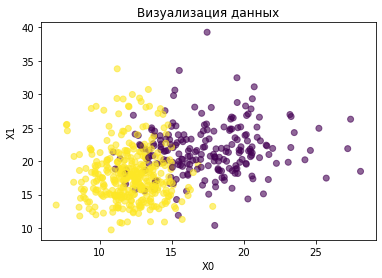

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
plt.title('Визуализация данных')
plt.xlabel('X0')
plt.ylabel('X1')

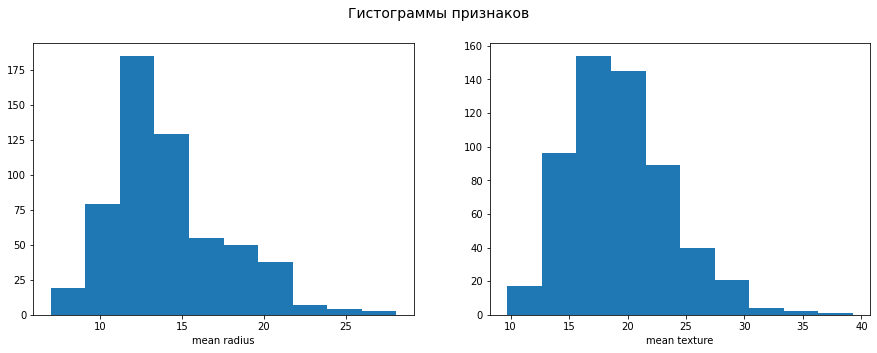

In [7]:
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [8]:
gaussian_nb = GaussianNB()

In [9]:
gaussian_nb.fit(X, y)

GaussianNB()

Text(0, 0.5, 'X1')

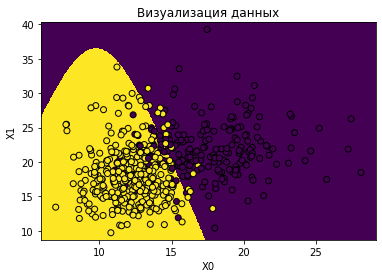

In [10]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = gaussian_nb.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, edgecolors='black',linewidth=1)
plt.title('Визуализация данных')
plt.xlabel('X0')
plt.ylabel('X1')

In [11]:
y_pred = gaussian_nb.predict(X)

In [12]:
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.9127516778523489


In [13]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [14]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917468


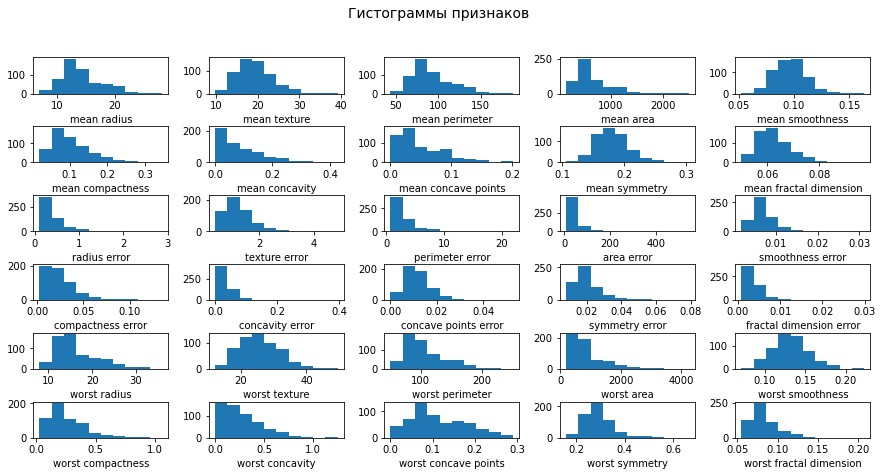

In [16]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [17]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [18]:
df = df.drop(['mean concavity','radius error', 
              'perimeter error', 'area error', 
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area', 
              'worst concavity'], 
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,concave points error,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.01587,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01340,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02058,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.01867,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01885,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678


In [19]:
X = df.values
y = data.target

In [20]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


## Задания для самостоятельного выполнения

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

### 1) На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

###### Мультономиальный

In [22]:
from sklearn.naive_bayes import MultinomialNB #для полином. распр. данных

In [23]:
data = datasets.load_breast_cancer()
X = data.data[:, :2]
y = data.target

multi_nb = MultinomialNB()
multi_nb.fit(X, y)

MultinomialNB()

Text(0, 0.5, 'X1')

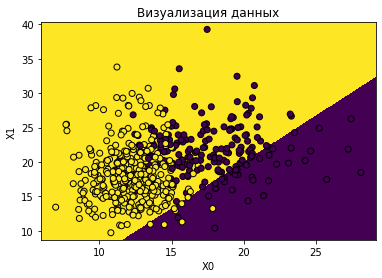

In [24]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = multi_nb.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, edgecolors='black',linewidth=1)
plt.title('Визуализация данных')
plt.xlabel('X0')
plt.ylabel('X1')

In [25]:
y_pred = multi_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[ 36 176]
 [  7 350]]
Accuracy=  0.6783831282952548
F1_score=  0.7927519818799548


In [26]:
X = data.data
y = data.target

multi_nb.fit(X, y)
y_pred = multi_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[163  49]
 [ 10 347]]
Accuracy=  0.8963093145869947
F1_score=  0.9216467463479415


###### Бернулли

In [27]:
from sklearn.naive_bayes import BernoulliNB

In [28]:
data = datasets.load_breast_cancer()
X = data.data[:, :2]
y = data.target

bernulli_nb = BernoulliNB()
bernulli_nb.fit(X, y)

BernoulliNB()

Text(0, 0.5, 'X1')

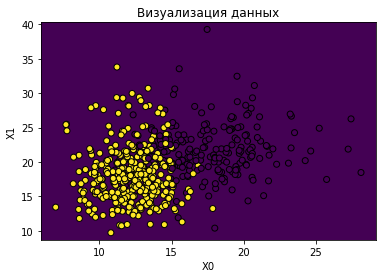

In [29]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = bernulli_nb.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, edgecolors='black',linewidth=1)
plt.title('Визуализация данных')
plt.xlabel('X0')
plt.ylabel('X1')

In [30]:
y_pred = bernulli_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[  0 212]
 [  0 357]]
Accuracy=  0.6274165202108963
F1_score=  0.7710583153347732


In [31]:
X = data.data
y = data.target

bernulli_nb.fit(X, y)
y_pred = bernulli_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[  0 212]
 [  0 357]]
Accuracy=  0.6274165202108963
F1_score=  0.7710583153347732


###### Категориальные

In [33]:
from sklearn.naive_bayes import CategoricalNB

In [34]:
data = datasets.load_breast_cancer()
X = data.data[:, :2]
y = data.target

categorical_nb = CategoricalNB()
categorical_nb.fit(X, y)

CategoricalNB()

In [35]:
y_pred = categorical_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[178  34]
 [ 21 336]]
Accuracy=  0.9033391915641477
F1_score=  0.9243466299862448


In [36]:
X = data.data
y = data.target

categorical_nb.fit(X, y)
y_pred = categorical_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[192  20]
 [  3 354]]
Accuracy=  0.9595782073813708
F1_score=  0.9685362517099864


###### Комплементарный

In [37]:
from sklearn.naive_bayes import ComplementNB #похож на полиномиальный

In [38]:
data = datasets.load_breast_cancer()
X = data.data[:, :2]
y = data.target

complement_nb = ComplementNB()
complement_nb.fit(X, y)

ComplementNB()

Text(0, 0.5, 'X1')

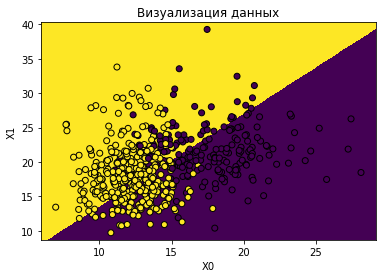

In [39]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = complement_nb.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, edgecolors='black',linewidth=1)
plt.title('Визуализация данных')
plt.xlabel('X0')
plt.ylabel('X1')

In [41]:
y_pred = complement_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[134  78]
 [136 221]]
Accuracy=  0.6239015817223199
F1_score=  0.6737804878048781


In [42]:
X = data.data
y = data.target

complement_nb.fit(X, y)
y_pred = complement_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[163  49]
 [ 11 346]]
Accuracy=  0.8945518453427065
F1_score=  0.9202127659574469


### 2) Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [43]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2024/ML3.6%20bayes/titanic.csv")
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,1,29.0,1,2,23.4500,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,1,0,0


In [44]:
X = data.iloc[:, 2:]
y = data['Survived']

gauss_nb = GaussianNB()
gauss_nb.fit(X, y)

GaussianNB()

In [45]:
X.shape

(891, 9)

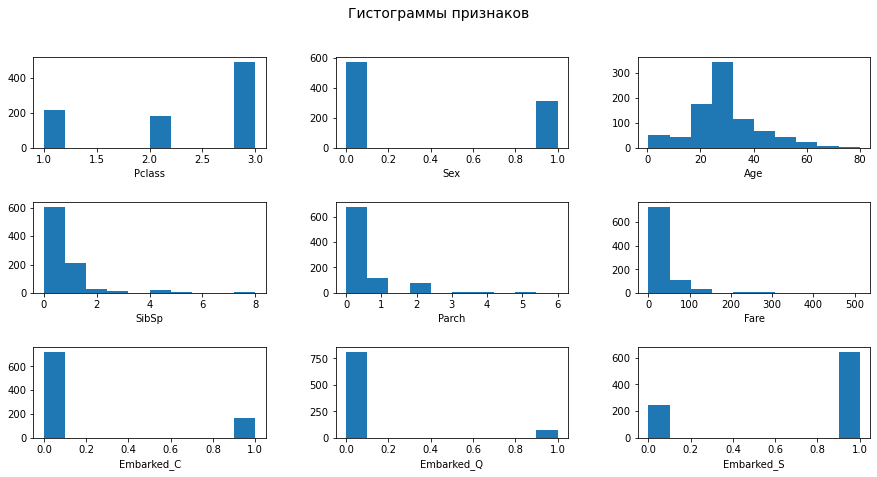

In [46]:
f = plt.figure(figsize=(15, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.hist(X.iloc[:, i])
    
    plt.xlabel(X.columns[i])
f.subplots_adjust(hspace=0.6,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [47]:
y_pred = gauss_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[453  96]
 [ 94 248]]
Accuracy=  0.7867564534231201
F1_score=  0.7230320699708455


In [48]:
X = data.iloc[:, 4:5] #Age
y = data['Survived']

gauss_nb = GaussianNB()
gauss_nb.fit(X, y)

y_pred = gauss_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[535  14]
 [310  32]]
Accuracy=  0.6363636363636364
F1_score=  0.16494845360824742


In [49]:
X = data.iloc[:, 4:8] #Age, ...Fare
y = data['Survived']

gauss_nb = GaussianNB()
gauss_nb.fit(X, y)

y_pred = gauss_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[521  28]
 [254  88]]
Accuracy=  0.6835016835016835
F1_score=  0.3842794759825327


In [50]:
# Мультономиальный

X = data.iloc[:, 2:]
y = data['Survived']

multi_nb = MultinomialNB()
multi_nb.fit(X, y)

y_pred = multi_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[455  94]
 [183 159]]
Accuracy=  0.6891133557800224
F1_score=  0.534453781512605


In [51]:
# Бернулли

X = data.iloc[:, 2:]
y = data['Survived']

bernulli_nb = BernoulliNB()
bernulli_nb.fit(X, y)

y_pred = bernulli_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[457  92]
 [100 242]]
Accuracy=  0.7845117845117845
F1_score=  0.7159763313609468


In [52]:
# Категориальный

X = data.iloc[:, 2:]
y = data['Survived']

categorial_nb = CategoricalNB()
categorial_nb.fit(X, y)

y_pred = categorial_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[488  61]
 [104 238]]
Accuracy=  0.8148148148148148
F1_score=  0.7425897035881435


In [53]:
# Комплементарный

X = data.iloc[:, 2:]
y = data['Survived']

comlem_nb = ComplementNB()
comlem_nb.fit(X, y)

y_pred = comlem_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[454  95]
 [178 164]]
Accuracy=  0.6936026936026936
F1_score=  0.5457570715474209


### 3) Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [54]:
df = pd.read_csv('Kaggle/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df['Cabin_Class'] = df.Cabin.str[0]

df['Cabin_Class'] = df['Cabin_Class'].fillna(0)

df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Class
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,0


In [56]:
df['Cabin_Class'].value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Class, dtype: int64

In [57]:
df_tr = pd.get_dummies(df, columns=['Sex', 'Cabin_Class','Embarked'], drop_first=True)
df_tr.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_Class_A,Cabin_Class_B,Cabin_Class_C,Cabin_Class_D,Cabin_Class_E,Cabin_Class_F,Cabin_Class_G,Cabin_Class_T,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,0,0,0,0,0,0,1


In [58]:
df_tr.dropna(inplace=True)

In [60]:
X_train = df_tr.iloc[:, 1:]
y_train = df_tr.iloc[:, 0]
X_train.shape

(714, 16)

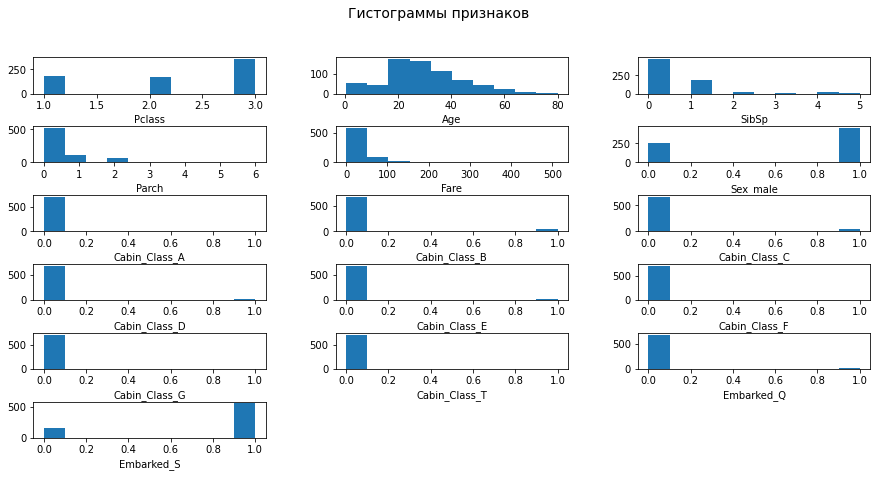

In [61]:
f = plt.figure(figsize=(15, 7))
for i in range(16):
    plt.subplot(6, 3, i+1)
    plt.hist(X_train.iloc[:, i])
    
    plt.xlabel(X_train.columns[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [82]:
df_test = pd.read_csv('Kaggle/Titanic/test.csv')
df_surv = pd.read_csv('Kaggle/Titanic/gender_submission.csv')

df_test = pd.merge(df_test, df_surv, on='PassengerId') 

df_test['Cabin_Class'] = df_test.Cabin.str[0]
df_test['Pclass'] = df_test['Pclass'].fillna(0)
df_test['Cabin_Class'] = df['Cabin_Class'].fillna(0)
df_test = df_test.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Cabin_Class','Embarked'], drop_first=True)

df_test.dropna(inplace=True)

y_test = df_test['Survived']
df_test = df_test.drop(columns=['Survived'])
X_test = df_test

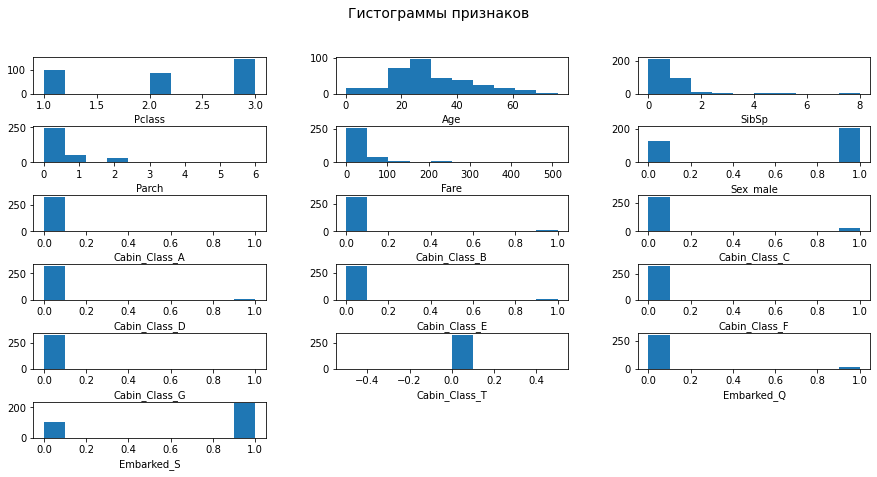

In [63]:
f = plt.figure(figsize=(15, 7))
for i in range(16):
    plt.subplot(6, 3, i+1)
    plt.hist(X_test.iloc[:, i])
    
    plt.xlabel(X_test.columns[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [64]:
#Гаусс

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

y_pred = gauss_nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy= ', accuracy_score(y_test, y_pred))
print('F1_score= ', f1_score(y_test, y_pred))

[[124  80]
 [ 12 115]]
Accuracy=  0.7220543806646526
F1_score=  0.7142857142857143


In [65]:
#Мультономиальный

multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

y_pred = multi_nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy= ', accuracy_score(y_test, y_pred))
print('F1_score= ', f1_score(y_test, y_pred))

[[156  48]
 [ 70  57]]
Accuracy=  0.6435045317220544
F1_score=  0.49137931034482757


In [66]:
#Бернулли

bernulli_nb = BernoulliNB()
bernulli_nb.fit(X_train, y_train)

y_pred = bernulli_nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy= ', accuracy_score(y_test, y_pred))
print('F1_score= ', f1_score(y_test, y_pred))

[[194  10]
 [  0 127]]
Accuracy=  0.9697885196374623
F1_score=  0.9621212121212122


In [67]:
#Комплементарный

complement_nb = ComplementNB()
complement_nb.fit(X_train, y_train)

y_pred = complement_nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy= ', accuracy_score(y_test, y_pred))
print('F1_score= ', f1_score(y_test, y_pred))

[[153  51]
 [ 69  58]]
Accuracy=  0.6374622356495468
F1_score=  0.49152542372881364


In [68]:
#Категориальный

categorial_nb = CategoricalNB(min_categories=9)
categorial_nb.fit(X_train, y_train)

y_pred = categorial_nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy= ', accuracy_score(y_test, y_pred))
print('F1_score= ', f1_score(y_test, y_pred))

[[171  33]
 [ 44  83]]
Accuracy=  0.7673716012084593
F1_score=  0.683127572016461


In [69]:
df_tr['Age_categ'] = pd.qcut(df_tr['Age'], q=5, labels=False)
df_tr['Fare_categ'] = pd.qcut(df_tr['Fare'], q=5, labels=False)
df_tr = df_tr.drop(columns=['Age','Fare'])
df_tr.head()

,Survived,Pclass,SibSp,Parch,Sex_male,Cabin_Class_A,Cabin_Class_B,Cabin_Class_C,Cabin_Class_D,Cabin_Class_E,Cabin_Class_F,Cabin_Class_G,Cabin_Class_T,Embarked_Q,Embarked_S,Age_categ,Fare_categ
0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,3,4
2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
3,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,3,4
4,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1


In [83]:
df_test['Age_categ'] = pd.qcut(df_test['Age'], q=4, labels=False)
df_test['Fare_categ'] = pd.qcut(df_test['Fare'], q=4, labels=False)
df_test = df_test.drop(columns=['Age','Fare'])
df_test.head()

,Pclass,SibSp,Parch,Sex_male,Cabin_Class_A,Cabin_Class_B,Cabin_Class_C,Cabin_Class_D,Cabin_Class_E,Cabin_Class_F,Cabin_Class_G,Cabin_Class_T,Embarked_Q,Embarked_S,Age_categ,Fare_categ
0,3,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0
1,3,1,0,0,0,0,1,0,0,0,0,0,0,1,3,0
2,2,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1
3,3,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
4,3,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1


In [84]:
X_train = df_tr.iloc[:, 1:]

X_test = df_test

In [85]:
#Категориальный

categorial_nb_new = CategoricalNB(min_categories=9)
categorial_nb_new.fit(X_train, y_train)

y_pred = categorial_nb_new.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy= ', accuracy_score(y_test, y_pred))
print('F1_score= ', f1_score(y_test, y_pred))

[[176  28]
 [ 37  90]]
Accuracy=  0.8036253776435045
F1_score=  0.7346938775510204


### Дополнительные задания

#### 1) Напишите универсальную функцию рисования произвольного количества гистограмм, которую можно применить к любому датасету.

In [86]:
def draw_hist(df, columns=3):
    df = pd.DataFrame(df)
    count = df.shape[1]
    lines = count//columns + 1
    f = plt.figure(figsize=(15, 7))
    for i in range(count):
        plt.subplot(lines, columns, i+1)
        plt.hist(df.iloc[:, i])

        plt.xlabel(df.columns[i])
        
    f.subplots_adjust(hspace=0.9,wspace=0.3)    
    plt.suptitle('Гистограммы признаков',fontsize=14)
    plt.show()

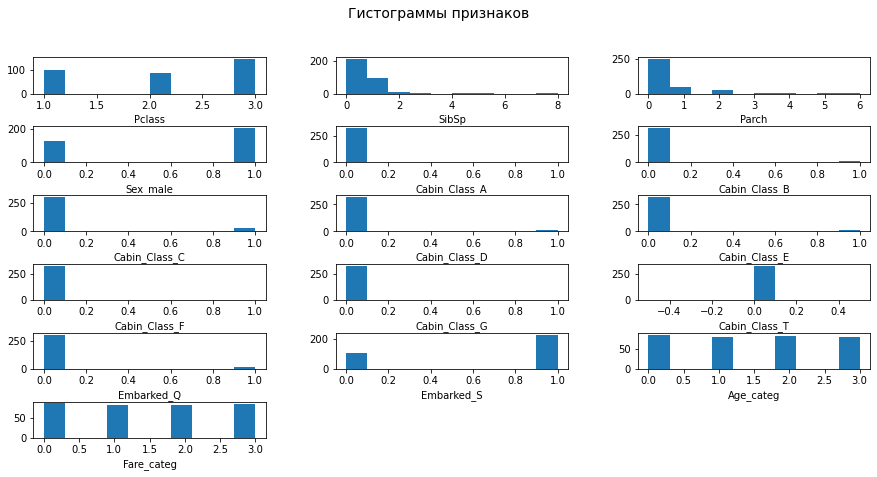

In [87]:
draw_hist(X_test)

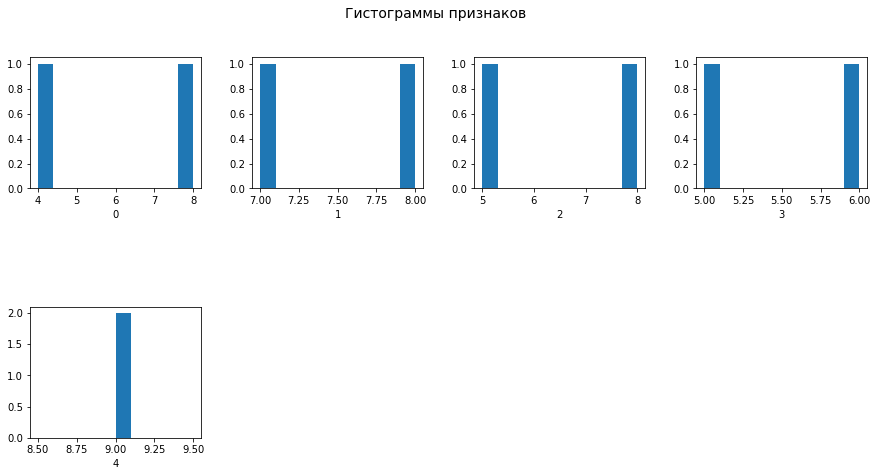

In [88]:
draw_hist(np.array([[4,7,5,5,9],[8,8,8,6,9]]),4)